## Importing Modules

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

## Loading Dataset

In [3]:
df = pd.read_csv('WineQT.csv')
df.drop(columns = ['Id'], inplace=True)
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


## Analyzing Data

In [4]:
# statistical info of data
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000
mean,8.311111,0.531339,0.268364,2.532152,0.086933,15.615486,45.914698,0.996730,3.311015,0.657708,10.442111,5.657043
std,1.747595,0.179633,0.196686,1.355917,0.047267,10.250486,32.782130,0.001925,0.156664,0.170399,1.082196,0.805824
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.392500,0.090000,1.900000,0.070000,7.000000,21.000000,0.995570,3.205000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.250000,2.200000,0.079000,13.000000,37.000000,0.996680,3.310000,0.620000,10.200000,6.000000
75%,9.100000,0.640000,0.420000,2.600000,0.090000,21.000000,61.000000,0.997845,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,68.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [5]:
# datatype info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1143 entries, 0 to 1142
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1143 non-null   float64
 1   volatile acidity      1143 non-null   float64
 2   citric acid           1143 non-null   float64
 3   residual sugar        1143 non-null   float64
 4   chlorides             1143 non-null   float64
 5   free sulfur dioxide   1143 non-null   float64
 6   total sulfur dioxide  1143 non-null   float64
 7   density               1143 non-null   float64
 8   pH                    1143 non-null   float64
 9   sulphates             1143 non-null   float64
 10  alcohol               1143 non-null   float64
 11  quality               1143 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 107.3 KB


## Preprocessing Data

In [6]:
df.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

## Exploratory Data Analysis

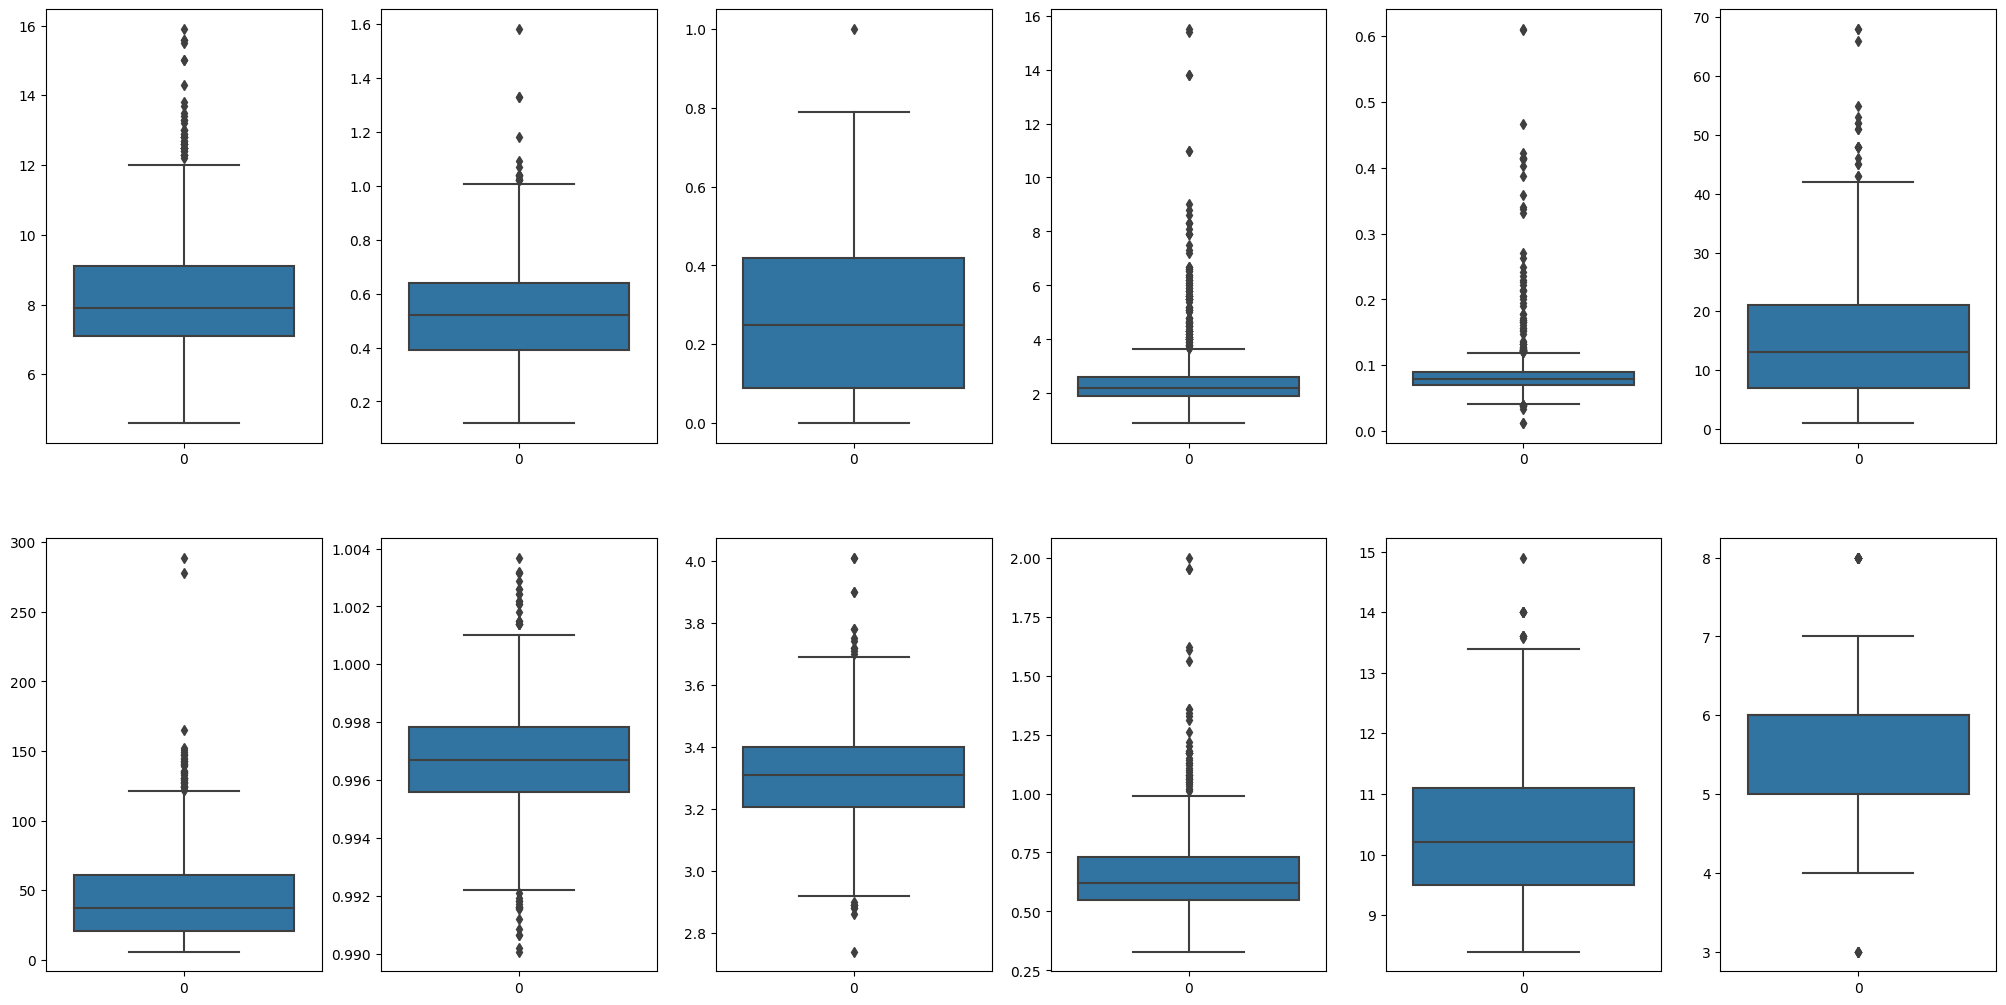

In [7]:
# create box plot
fig, ax = plt.subplots(ncols = 6, nrows = 2, figsize = (20, 10))
index = 0
ax = ax.flatten()

for col, value in df.items():
    sns.boxplot(value, ax=ax[index])
    index+=1
plt.tight_layout(pad=0.5, w_pad=0.7, h_pad=5.0)

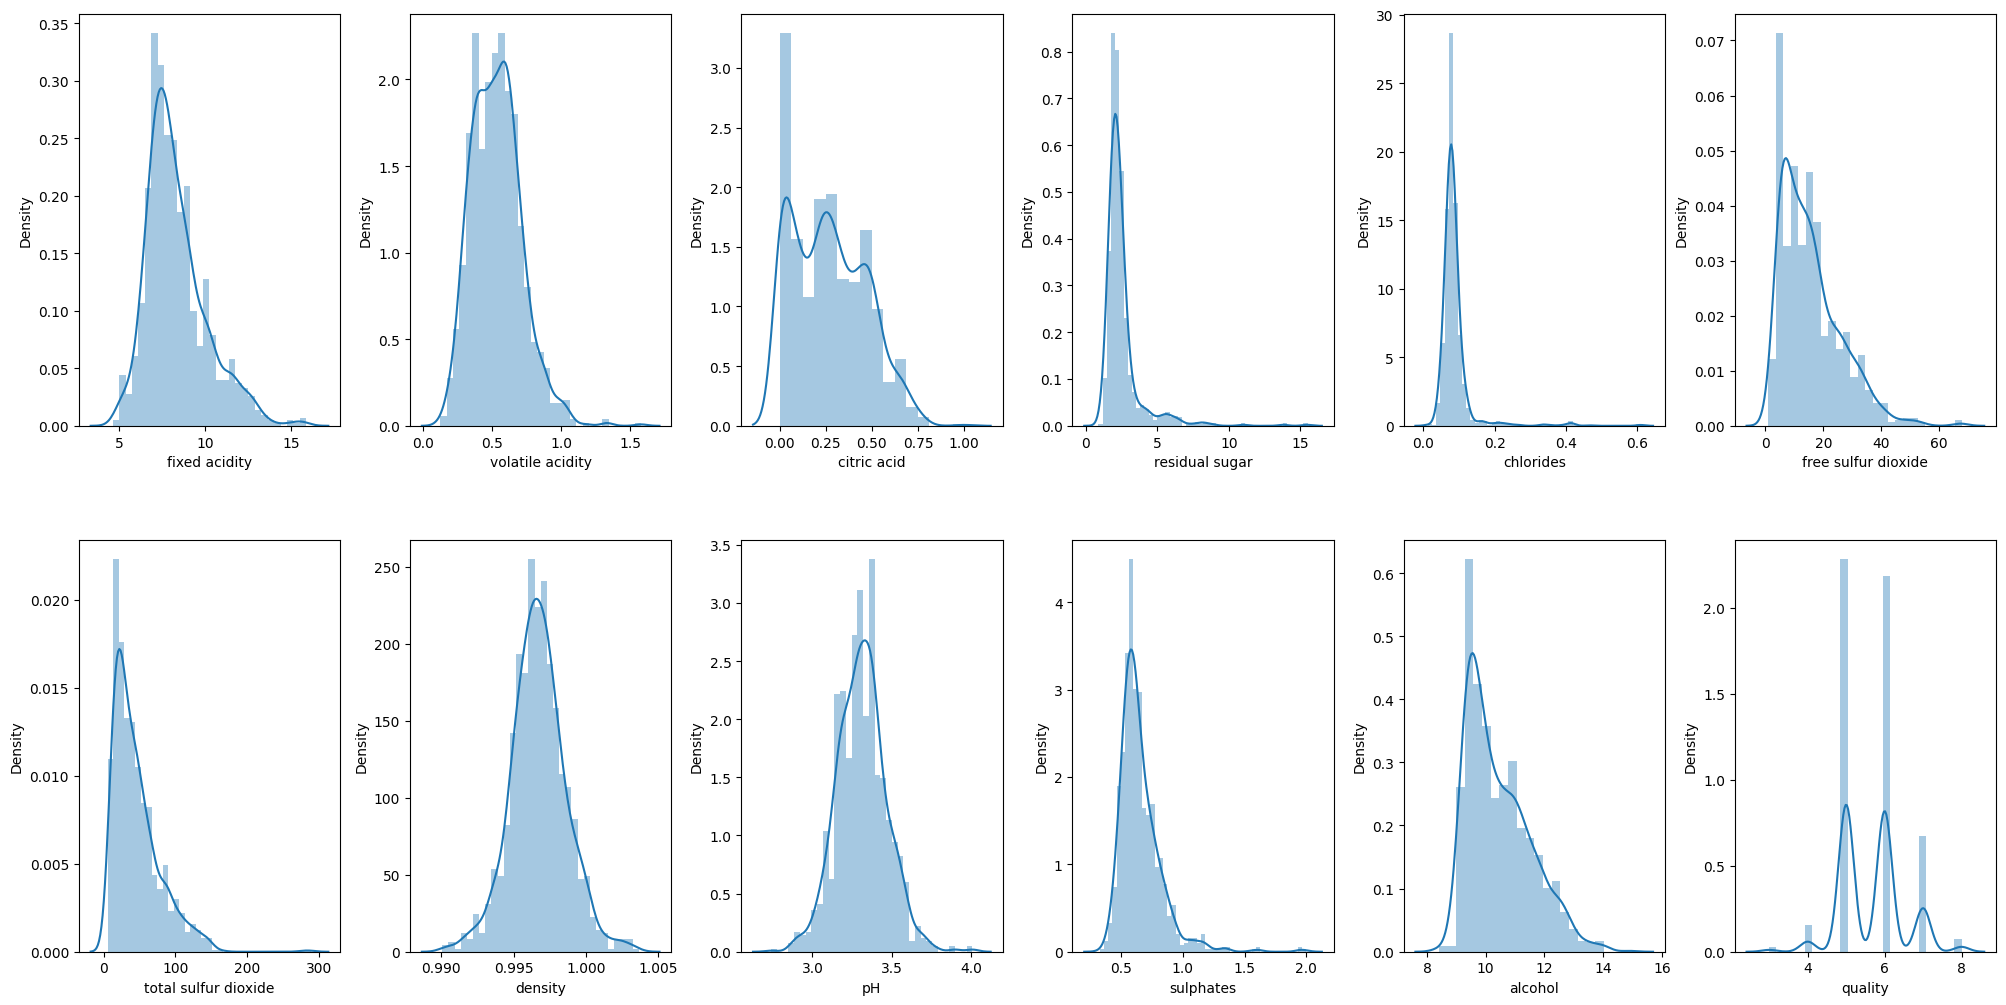

In [8]:
# create dist plot
fig, ax = plt.subplots(ncols = 6, nrows = 2, figsize = (20, 10))
index = 0
ax = ax.flatten()

for col, value in df.items():
    sns.distplot(value, ax=ax[index])
    index+=1
plt.tight_layout(pad=0.5, w_pad=0.7, h_pad=5.0)

<Axes: xlabel='total sulfur dioxide', ylabel='Density'>

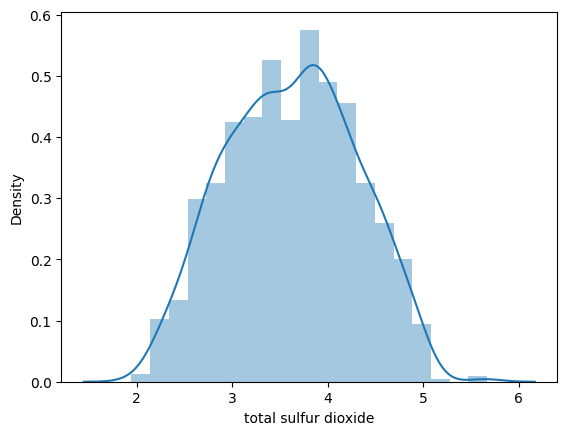

In [9]:
df['total sulfur dioxide'] = np.log(df['total sulfur dioxide'] + 1)
sns.distplot(df['total sulfur dioxide'])

<Axes: xlabel='free sulfur dioxide', ylabel='Density'>

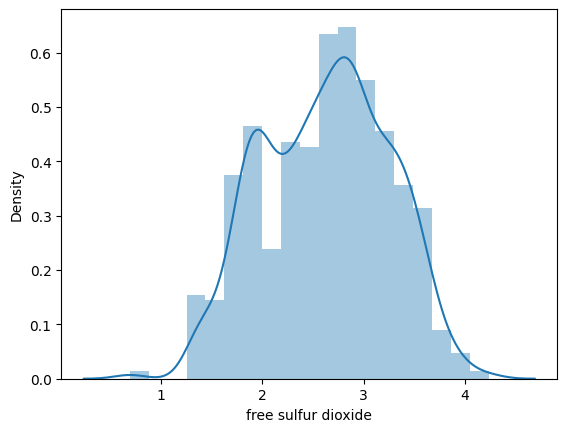

In [10]:
df['free sulfur dioxide'] = np.log(df['free sulfur dioxide'] + 1)
sns.distplot(df['free sulfur dioxide'])

<Axes: ylabel='count'>

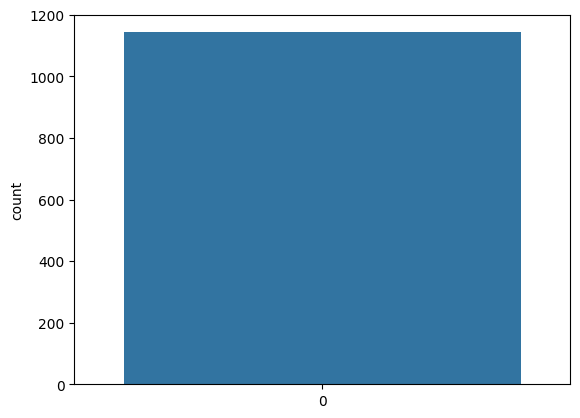

In [11]:
sns.countplot(df['quality'])

## Correlation Matrix

<Axes: >

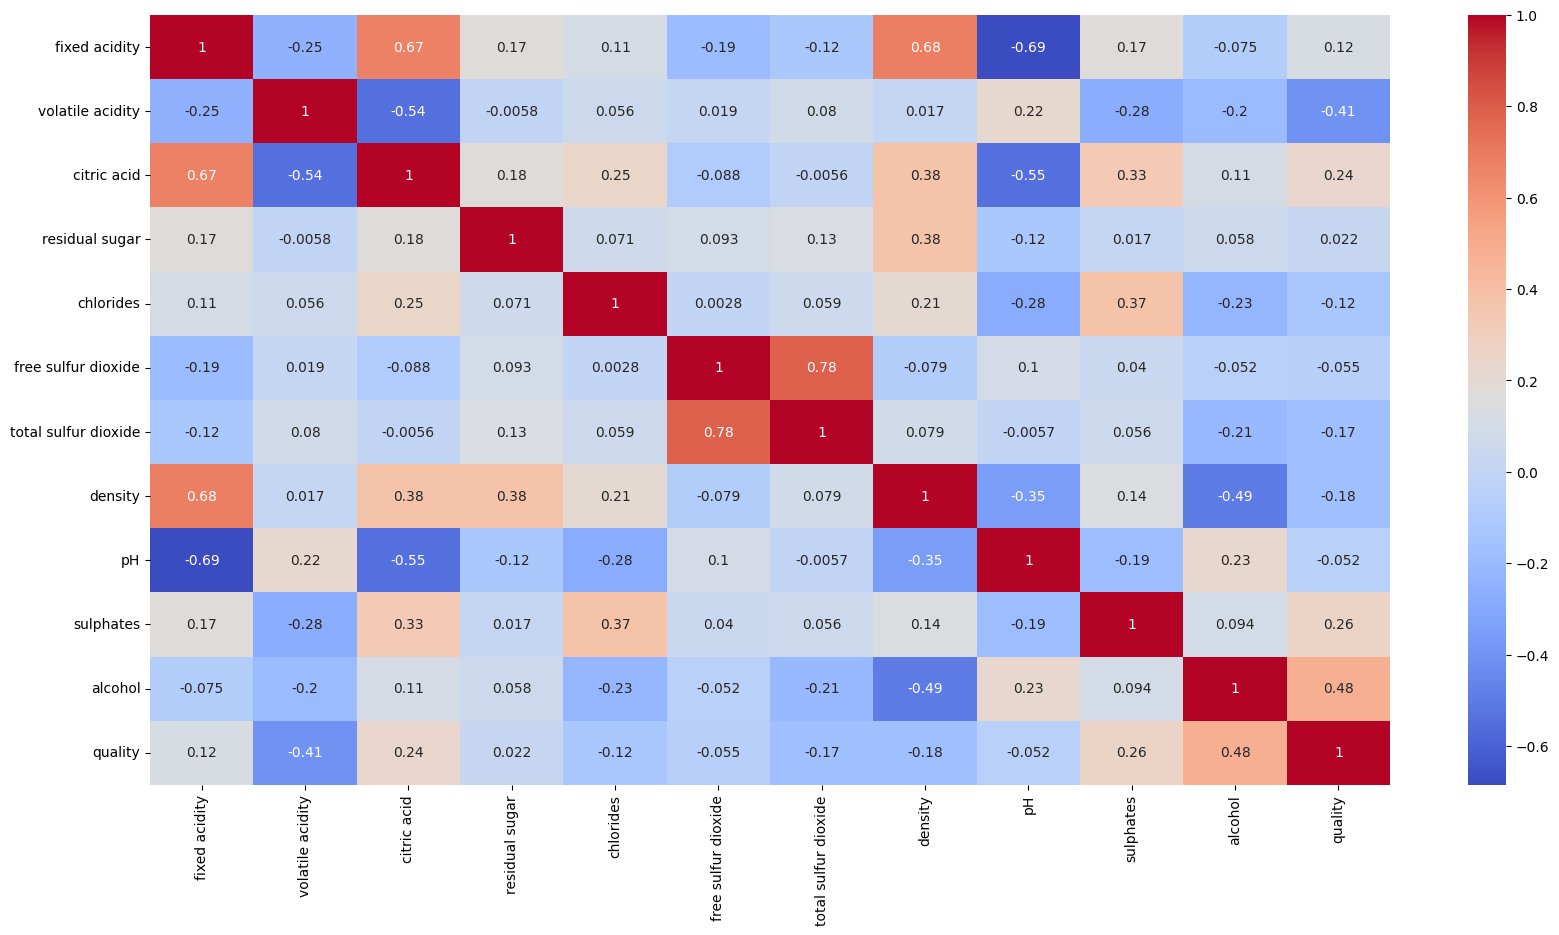

In [12]:
corr = df.corr()
plt.figure(figsize = (20, 10))
sns.heatmap(corr, annot=True, cmap='coolwarm')

## Train-Test Split

In [13]:
# define Input and Output variables
X = df.drop(columns = ['quality'], axis = 1)
y = df['quality']

## Class Imbalancement

In [14]:
y.value_counts()

quality
5    483
6    462
7    143
4     33
8     16
3      6
Name: count, dtype: int64

In [16]:
# pip install imblearn

In [19]:
from imblearn.over_sampling import SMOTE
oversample = SMOTE(k_neighbors=4)
# transform the dataset
X, y = oversample.fit_resample(X, y)

In [18]:
y.value_counts()

quality
5    483
6    483
7    483
4    483
8    483
3    483
Name: count, dtype: int64

## Model Training

In [20]:
from sklearn.model_selection import cross_val_score, train_test_split

def train(model, X, y):
    # train the model
    x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)
    model.fit(x_train, y_train)
    
    print("Accuracy: ", model.score(x_test, y_test)*100)
    
    # Perform Cross Validation
    cv_score = cross_val_score(model, X, y, cv=5)
    cv_score = np.mean(cv_score)*100
    
    print("CV Score: ", cv_score)

In [21]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()

train(model, X, y)

Accuracy:  58.48275862068966
CV Score:  52.620749210886785


In [22]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier()
train(model, X, y)

Accuracy:  75.17241379310344
CV Score:  75.19075695312965


In [23]:
# Model Training with RandomForest and ExtraTreesClassifier
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier
model = RandomForestClassifier()

train(model, X, y)

Accuracy:  85.6551724137931
CV Score:  82.57518908939312


In [24]:
model = ExtraTreesClassifier()

train(model, X, y)

Accuracy:  86.48275862068967
CV Score:  83.64469060806385


## Hyper Parameters Tunning

In [28]:
model = RandomForestClassifier(n_estimators=100, min_samples_split=9, max_depth=9, max_features=1)
train(model, X, y)

Accuracy:  82.06896551724138
CV Score:  79.43410160204871
